# DS 3000 HW 7 $\color{red}{\text{SOLUTIONS}}$

Due: Friday Nov 18 @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file to Gradescope ([1:35 Section](https://www.gradescope.com/courses/431947) [3:25 Section](https://www.gradescope.com/courses/431864)) (this can also be done via the assignment on Canvas).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the `ipynb` file to gradescope.

### Tips for success
- Start early
- Make use of Piazza ([1:35 Section](https://piazza.com/class/l7dkfe3cgz21ul) [3:25 Section](https://piazza.com/class/l7dkey4g6m71e5)) (also accessable through Canvas)
- Make use of [Office Hours](https://docs.google.com/spreadsheets/d/1SMacPh9lhRvjHI1VCJfBbNGSga3RTYKzSsfRWEWqWQI/edit?usp=sharing)
- Remember to use cells and headings to make the notebook easy to read (if a grader cannot find the answer to a problem, you will receive no points for it)
    - Remember that documentation/style is important (See the Style Guide on Canvas!)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), though you are welcome to **talk about** (not show each other) the problems.

In [1]:
# below are all the modules you will need on this homework
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pylab as py
import scipy.stats as stats

## Part 1: Decision Tree (20 total points)

For this problem you will use the `df_owl_2018.csv` file in your Homework Module on Canvas. This data set contains statistics from the 2018 Overwatch League (cleaned from [this website](https://overwatchleague.com/en-us/statslab?statslab=heroes)). Overwatch is a video game where two teams of 6 players compete against each other. On each team, a player may assume one of three roles:
- Damage: whose job is to attack the other team
- Support: whose job is to heal their own team
- Tank: whose job is to absorb the damage of the other team

However, while those are the general jobs of each role, occasionally a player in one role behaves more like another. In this part, we will see if the numeric statistics from a game of Overwatch can be used to accurately predict the role of a player using a Decision Tree.

In [2]:
df_owl = pd.read_csv('df_owl_2018.csv')
df_owl.head()

,start_time,match_id,stage,map_type,map_name,player,team,hero,role,Ability Damage Done,...,Ultimates Used,Unscoped Accuracy,Unscoped Hits,Unscoped Shots,Venom Mine Kills,Weapon Accuracy,Weapon Kills,Whole Hog Efficiency,Whole Hog Kills,of Rockets Fired
0,2018-01-11 00:12:00,10223,Overwatch League - Stage 1,PAYLOAD,Dorado,Agilities,Los Angeles Valiant,Genji,Damage,0.0,...,8,0.0,0,0,0,0.273585,0,0.0,0,0.0
1,2018-01-11 00:12:00,10223,Overwatch League - Stage 1,PAYLOAD,Dorado,Danteh,San Francisco Shock,Genji,Damage,0.0,...,1,0.0,0,0,0,0.166667,0,0.0,0,0.0
2,2018-01-11 00:12:00,10223,Overwatch League - Stage 1,PAYLOAD,Dorado,Danteh,San Francisco Shock,Junkrat,Damage,0.0,...,3,0.0,0,0,0,0.137500,0,0.0,0,0.0
3,2018-01-11 00:12:00,10223,Overwatch League - Stage 1,PAYLOAD,Dorado,Danteh,San Francisco Shock,Tracer,Damage,0.0,...,3,0.0,0,0,0,0.327001,0,0.0,0,0.0
4,2018-01-11 00:12:00,10223,Overwatch League - Stage 1,PAYLOAD,Dorado,Envy,Los Angeles Valiant,D.Va,Tank,0.0,...,23,0.0,0,0,0,0.314785,0,0.0,0,0.0


### Part 1.1: Build a Decision Tree (8 points)

Create a Decision Tree to predict the `role` of an Overwatch player using all the numeric statistics as x features:
- Use `max_depth = 3`
- The code for creating the `x_feat_list` is:

```python
x_feat_list = list(df_owl.loc[:,'Ability Damage Done':'of Rockets Fired'].columns)
```
- Plot the tree and make sure you can easily read the nodes of the resulting Decision Tree (you will want to use `plt.gcf().set_size_inches()`)


$\color{red}{\text{Solution:}}$

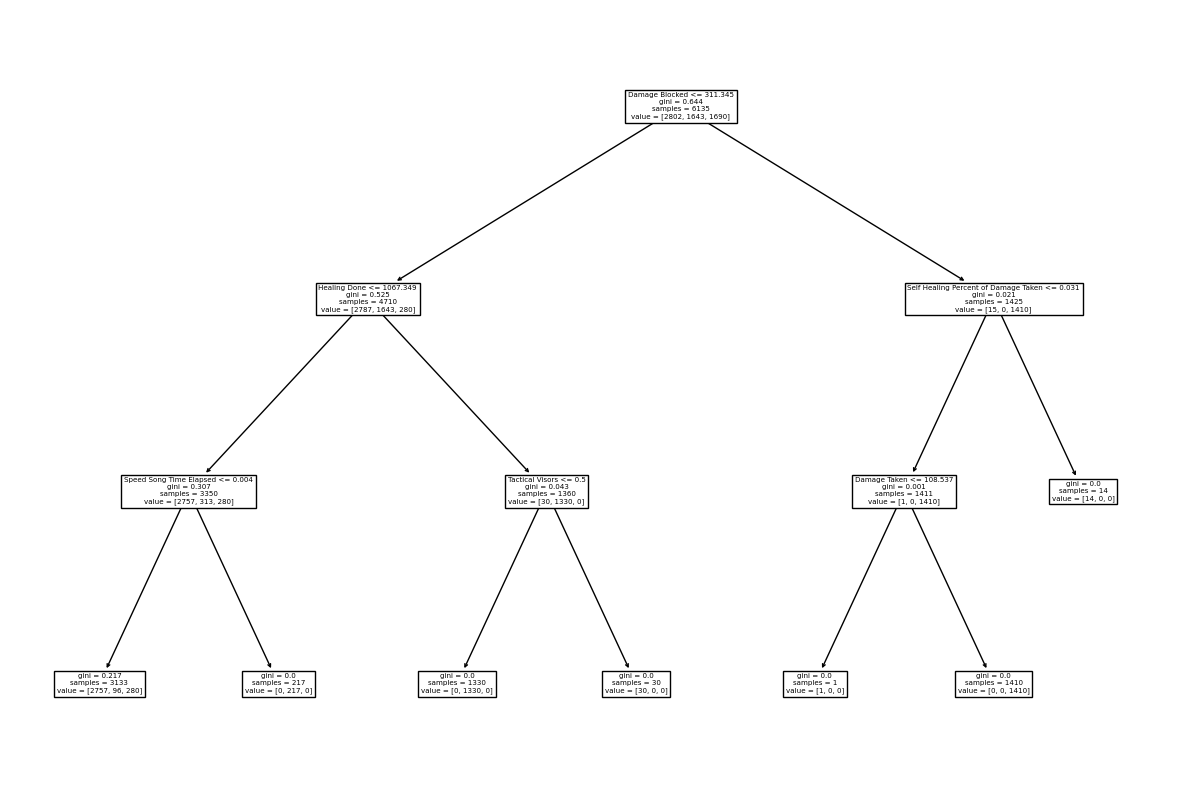

In [3]:
max_depth = 3

x_feat_list = list(df_owl.loc[:,'Ability Damage Done':'of Rockets Fired'].columns)

# extract data from dataframe
x = df_owl.loc[:, x_feat_list].values
y = df_owl.loc[:, 'role'].values
    
# build decision tree classifier
dec_tree_clf = tree.DecisionTreeClassifier(max_depth=max_depth)

# fit data
dec_tree_clf = dec_tree_clf.fit(x, y)
    
# plot figure of decision tree
# initialize empty figure (plot_tree sets text size to fill given figure
# if we resize figure afterwards text size remains too small)
plt.figure()
plt.gcf().set_size_inches(15, 10)
        
# 'plot' decision tree
tree.plot_tree(dec_tree_clf, feature_names=x_feat_list);

### Part 1.2: Predict Prof. Gerber's Role (4 points)

Professor Gerber used to play a lot of Overwatch, and he would usually play only one role. Download the `df_prof_gerber_ow.csv` file, which contains the average performance of Prof. Gerber when he played his favorite character in the game$^*$.
- Convert it to an array using `np.array`
- Predict the role Prof. Gerber most often played with the `dec_tree_clf.predict` function

$^*$ since Prof. Gerber only had access to some of the statistics, he made guesses for some of the values, but it should be a pretty good estimation.

$\color{red}{\text{Solution:}}$

In [4]:
df_profg = pd.read_csv('df_prof_gerber_ow.csv')
array_profg = np.array(df_profg)
dec_tree_clf.predict(array_profg)

array(['Support'], dtype=object)

### Part 1.3: Cross Validate and Compute Accuracy (8 points)

Can we trust this prediction? Peform a 10-fold cross validation Decision Tree, using a Stratified K Fold, and then create a confusion matrix of the resulting predictions vs. the true roles. Calculate the overall accuracy and discuss **in a markdown cell** with 2-3 sentences what you can say about how the decision tree is performing.

$\color{red}{\text{Solution:}}$

In [5]:
n_splits = 10 # 10-fold Cross Validation
max_depth = 3

x_feat_list = list(df_owl.loc[:,'Ability Damage Done':'of Rockets Fired'].columns)

x = df_owl.loc[:, x_feat_list].values
y = df_owl.loc[:, 'role'].values
    
# initialize k fold
skfold = StratifiedKFold(n_splits=n_splits)

# initialize decision tree
dec_tree_clf = tree.DecisionTreeClassifier(max_depth=max_depth)

# initialize y_pred, stores predictions of y
y_pred = np.empty_like(y)

for train_idx, test_idx in skfold.split(x, y):
    # get training data
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    
    # get test data    
    x_test = x[test_idx, :]
    
    # fit data
    dec_tree_clf = dec_tree_clf.fit(x_train, y_train)
    
    # estimate on test data
    y_pred[test_idx] = dec_tree_clf.predict(x_test)

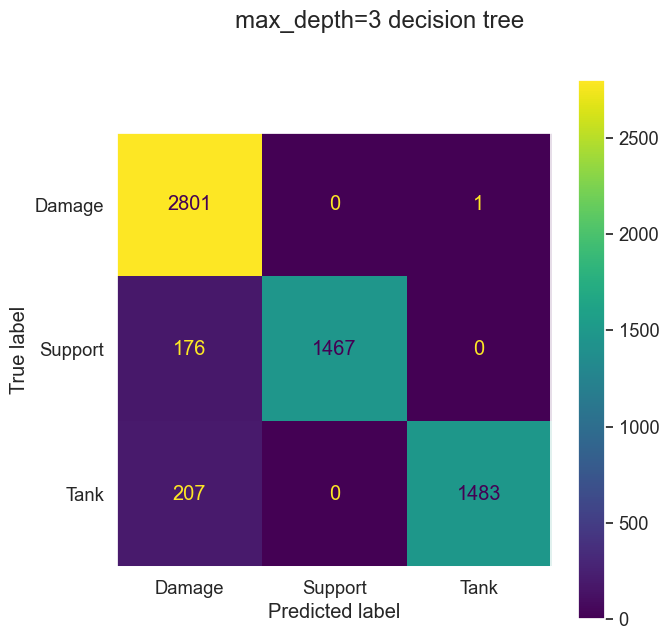

In [6]:
conf_mat = confusion_matrix(y_true=y, y_pred=y_pred)

conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y))

sns.set(font_scale=1.2)
conf_mat_disp.plot()
plt.gcf().set_size_inches(7, 7)
plt.grid(False)
plt.suptitle('max_depth=3 decision tree');

In [7]:
accuracy_score(y, y_pred)

0.9374083129584352

**Note: the numeric results may be slightly different because of the random folds in the cross validation**

The overall accuracy of the Decision Tree is pretty good (93.7%), and there seems to be pretty good ability to predict all three of the roles. Damage is predicted the best, then Support, then Tank. Occasinally, Support roles are predicted as Damage, but if we predict someone to have a Support role, we can be very confident the prediction is correct (same too for Tank). Tank roles are also occasionally mistaken for Damage. This means:
- We have almost perfect sensitivity for Damage (99.89%)
- Decent sensitivity for Support (89.29%) and Tank (87.75%)
- Almost perfect specificity for Support (99.93%) and Tank (99.87%)
- Decent specificity for Damage (87.96%)

Looks like the Decision Tree is doing a pretty good job.

## Part 2: Random Forest (30 total points)

We would like to classify the importance of each x-feature in predicting the role of an Overwatch player, as well as avoid complaints that our single decision tree may be overfitting. To accomplish these two tasks, we will build a Random Forest using the same data as from Part 1.

### Part 2.1: Build the Random Forest (10 points)

Build a Random Forest Classifier which classifies the `role` of an Overwatch player using all of the numerical statistics from the data. Use `max_depth = 3` and 10-fold cross validation.

**Note:** do *not* specify `n_estimators` more than 1000. 1000 will take a little while to run (and may be worth it), but you may also just use the default of `n_estimators = 100` if you wish (though expect worse results).

$\color{red}{\text{Solution:}}$

In [8]:
# The classifier via cross validation
n_splits = 10
max_depth = 3

x_feat_list = list(df_owl.loc[:,'Ability Damage Done':'of Rockets Fired'].columns)

x = df_owl.loc[:, x_feat_list].values
y = df_owl.loc[:, 'role'].values

# initialize k fold
skfold = StratifiedKFold(n_splits=n_splits)

# initialize random forest
rf_clf = RandomForestClassifier(max_depth=max_depth, n_estimators=1000)
# be careful with n_estimators here; because this is a decent sized data set
# any higher number of trees will run slowly

# initialize y_pred, stores predictions of y
y_pred = np.empty_like(y)

for train_idx, test_idx in skfold.split(x, y):
    # get training data
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    
    # get test data    
    x_test = x[test_idx, :]
    
    # fit data
    rf_clf = rf_clf.fit(x_train, y_train)
    
    # estimate on test data
    y_pred[test_idx] = rf_clf.predict(x_test)

### Part 2.2: Get the Confusion Matrix and Accuracy (10 points)

Create a confusion matrix of the resulting predictions vs. the true roles. Calculate the overall accuracy and discuss **in a markdown cell** with 1-2 sentences what you can say about how the random forest performs compared with the single decision tree. You *should* see at least a slight decrease in performance; why does that make sense? Is it a good/bad thing?

To get the labels for the roles, you'll want to define:

```python
y_feat_list = np.array(['Damage', 'Support', 'Tank'])
```

$\color{red}{\text{Solution:}}$

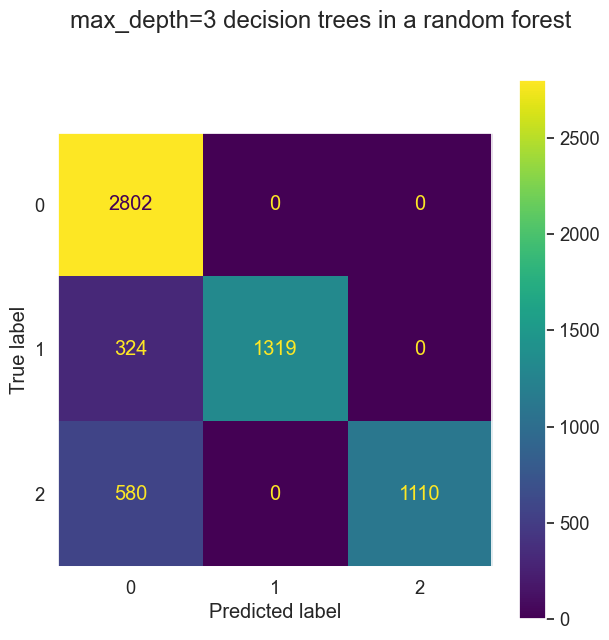

In [10]:
y_feat_list = np.array(['Damage', 'Support', 'Tank'])

# build and plot confusion matrix
sns.set(font_scale=1.2)
conf_mat = confusion_matrix(y_true=y, y_pred=y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=y_feat_list)
conf_mat_disp.plot()
plt.gcf().set_size_inches(7, 7)
plt.grid(False)
plt.suptitle('max_depth=3 decision trees in a random forest');

In [11]:
accuracy_score(y, y_pred)

0.8526487367563163

The Random Forest does a slightly worse job (there are more misclassified roles) but this is not a bad thing; it gives us a better idea of how the x-features predict the roles because we are avoiding the overfitting of the single decision tree. There is usually a worse accuracy because the Random Forest uses random subsets of the data.

### Part 2.3: Feature Importance (10 points)

Print a bar plot (`plot_feat_import()` is provided for you) to describe the top 10 features which are most useful for classification.  Qualitatively describe if these most important features are meaningful. In other words:
- If the classifier performs well, we care about which features helped it work
- If the classifier doesn't perform well, we don't care which features helped it "work"

In [12]:
def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        ## not sure why, but .argsort had been doing decreasing by default, but this is now increasing
        ## This will now only work if you set the limit, since I flip it around in the next if block
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[-limit:]
        feat_import = feat_import[-limit:]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(Mean decrease in Gini across all Decision Trees)')

$\color{red}{\text{Solution:}}$

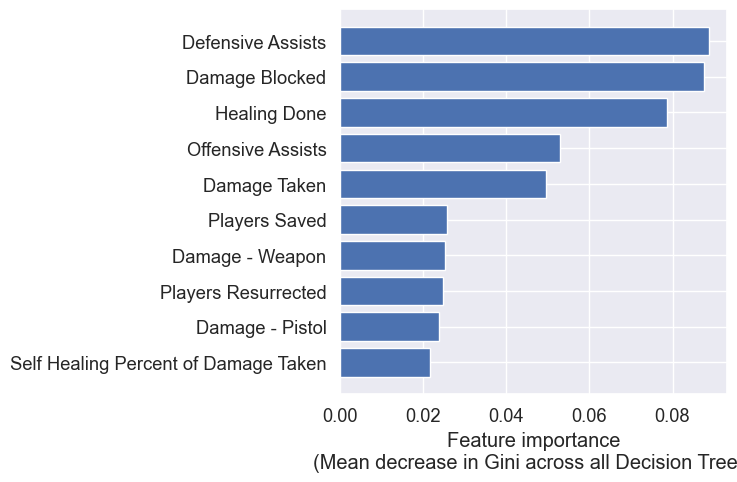

In [13]:
plot_feat_import(x_feat_list, rf_clf.feature_importances_, limit=10)

Since the classifier seems to be pretty useful, we can trust that these features tend to be the most important in distinguishing roles. In fact, they make some sense (though a thorough understanding of Overwatch isn't required), because Tanks job is to block damage, that should be important in determining if an observation is a Tank. Similarly, since Supports are supposed to heal, it makes sence that there are a few healing features on the top 10 list.

## Part 3: Simple Linear Regression (50 points)

One of the characters you can play in Overwatch, Mercy, is a support character. Mercy's primary purpose is to heal others. Sometimes when she is healing another character, that character manages to defeat an opponent. This counts as a `Defensive Assists` statistic. In this part, we will see if we can predict how many `Defensive Assists` a player achieves as Mercy given the amount of `Healing Done`, in thousands.

### Part 3.1: Data Manipulation (10 points)

Before starting, we need to do two things:
1. subset the data set so that it only includes Mercy observations
    - **hint:** you should remove all `hero` values besides `Mercy`
2. divide the `Healing Done` column by `1000` so that the values are in thousands of points
    - this will assist in the interpretation of the slope

$\color{red}{\text{Solution:}}$

In [14]:
bool_mercy = df_owl['hero'] == 'Mercy'
df_mercy = df_owl.loc[bool_mercy,:]
# the below might produce a SettingWithCopyWarning, but it will work
df_mercy['Healing Done'] = df_mercy['Healing Done']/1000
df_mercy.head()

C:\Users\eager\AppData\Local\Temp\ipykernel_16240\2839345255.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mercy['Healing Done'] = df_mercy['Healing Done']/1000


,start_time,match_id,stage,map_type,map_name,player,team,hero,role,Ability Damage Done,...,Ultimates Used,Unscoped Accuracy,Unscoped Hits,Unscoped Shots,Venom Mine Kills,Weapon Accuracy,Weapon Kills,Whole Hog Efficiency,Whole Hog Kills,of Rockets Fired
6,2018-01-11 00:12:00,10223,Overwatch League - Stage 1,PAYLOAD,Dorado,KariV,Los Angeles Valiant,Mercy,Support,0.0,...,5,0.0,0,0,0,0.333333,0,0.0,0,0.0
12,2018-01-11 00:12:00,10223,Overwatch League - Stage 1,PAYLOAD,Dorado,dhaK,San Francisco Shock,Mercy,Support,0.0,...,7,0.0,0,0,0,1.000000,0,0.0,0,0.0
23,2018-01-11 00:34:00,10223,Overwatch League - Stage 1,ASSAULT,Temple of Anubis,KariV,Los Angeles Valiant,Mercy,Support,0.0,...,6,0.0,0,0,0,0.085714,0,0.0,0,0.0
34,2018-01-11 00:34:00,10223,Overwatch League - Stage 1,ASSAULT,Temple of Anubis,dhaK,San Francisco Shock,Mercy,Support,0.0,...,7,0.0,0,0,0,0.411765,0,0.0,0,0.0
43,2018-01-11 01:11:00,10223,Overwatch League - Stage 1,CONTROL,Ilios,KariV,Los Angeles Valiant,Mercy,Support,0.0,...,5,0.0,0,0,0,0.265957,0,0.0,0,0.0


### Part 3.2: Get Predictions via Cross Validation (15 points)

Use `LinearRegression()` to fit the data and `reg.predict(x)` to get the `y_pred` predictions. Do this via 5-fold cross validation:

1. define your x (`Healing Done`) and y (`Defensive Assists`) arrays
1. set up a 5-fold `Kfold` object (no need to stratify, since there's nothing to stratify with)
2. initialize a `LinearRegression` object
2. initialize `y_pred`, a copy of `y`, to store predictions in
3. loop through the folds by `train_idx` and `test_idx`
    - fit the regression on `x_train` and `y_train`
    - predict using `x_test`
    
When you are done, calculate the $R^2$ of the cross validated predictions and interpret what it means and if it seems good or not. **Note:** there is no need to calculate/store the slopes and intercepts, since they will be slightly different for each fold of the cross validation.

$\color{red}{\text{Solution:}}$

In [15]:
n_splits = 5

x = np.array(df_mercy['Healing Done']).reshape(-1, 1)
y = np.array(df_mercy['Defensive Assists'])

# initialize k fold
kfold = KFold(n_splits=n_splits)

reg = LinearRegression()

# initialize y_pred, stores predictions of y
y_pred = np.empty_like(y)

for train_idx, test_idx in kfold.split(x, y):
    # get training data
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    
    # get test data    
    x_test = x[test_idx, :]
    
    # fit data
    reg = reg.fit(x_train, y_train)
    
    # estimate on test data
    y_pred[test_idx] = reg.predict(x_test)

In [16]:
r2_score(y_true=y, y_pred=y_pred)

0.6457691485621082

The $R^2$ implies that approximately 64.58% of the variability in Defensive Assists is explained by Healing Done. This is a reasonably strong value.

### Part 3.3: Plotting and Interpreting the Full Line (10 points)

Now, fit the regression model to the full data set, then use the `show_fit()` function below to plot it and recover the final best fit line for the model. Interpret both the slope and intercept in the context of the problem, explaining what they mean as if to a non-technical expert. **Recall** you put `Healing Done` in thousands of points, which will affect the wording of your interpretation of the slope.

In [17]:
def get_mse(y_true, y_pred):
    # calculate the mean squared distance between the predicted and actual y
    return np.mean((y_pred - y_true) ** 2)

def show_fit(x, y, slope, intercept):
    plt.figure()
    
    # transform the input data into numpy arrays and flatten them for easier processing
    x = np.array(x).ravel()
    y = np.array(y).ravel()
    
    # plot the actual data
    plt.scatter(x, y, label='data')
    
    # compute linear predictions 
    # x is a numpy array so each element gets multiplied by slope and intercept is added
    y_pred = slope * x + intercept
    
    # plot the linear fit
    plt.plot(x, y_pred, color='black',
             ls=':',
             label='linear fit')
    
    plt.legend()
    
    plt.xlabel('x')
    plt.ylabel('y')
    
    # print the mean squared error
    y_pred = slope * x + intercept
    mse = get_mse(y_true=y, y_pred=y_pred)
    plt.suptitle(f'y_hat = {slope:.2f} * x + {intercept:.2f}, MSE = {mse:.3f}')
 

$\color{red}{\text{Solution:}}$

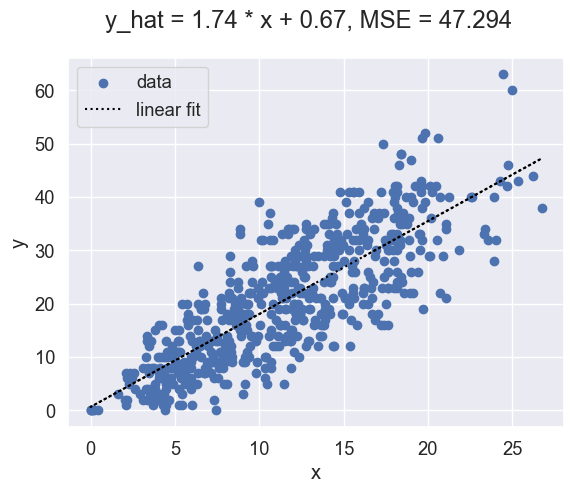

In [18]:
x = np.array(df_mercy['Healing Done']).reshape(-1, 1)
y = np.array(df_mercy['Defensive Assists'])

reg = LinearRegression()

reg.fit(x, y)

slope = reg.coef_[0]
intercept = reg.intercept_

show_fit(x, y, slope, intercept)

The slope of 1.74 means that for every 1000 points of Healing Done, we expect Mercy to have 1.74 more Defensive Assists. The intercept of .67 means that when Mercy does 0 points of Healing Done, we expect Mercy to have .67 total Defensive Assists.

### Part 3.4: Checking Assumptions and Making Recommendations (15 points)

Use plots to check to see if the data meet the assumptions for performing a linear regression:
1. independence
2. constant variance/linearity
3. normality

Then, **in a markdown cell**, write 3-4 sentences about whether the model meets the assumptions, what that tells you about the usefulness of the model, and recommendations for next steps.

$\color{red}{\text{Solution:}}$

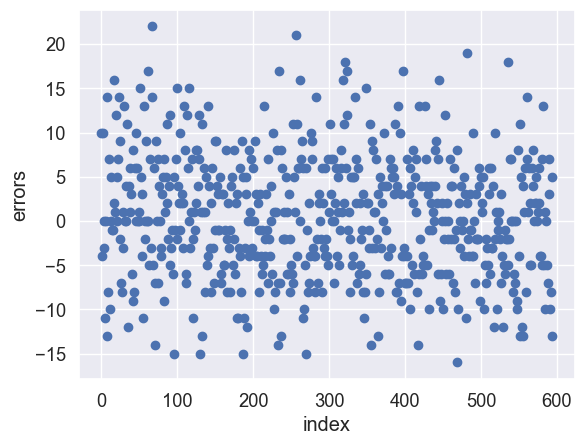

In [19]:
# check independence
errors = y - y_pred
plt.scatter(x = range(len(y)), y = errors)
plt.xlabel('index')
plt.ylabel('errors');

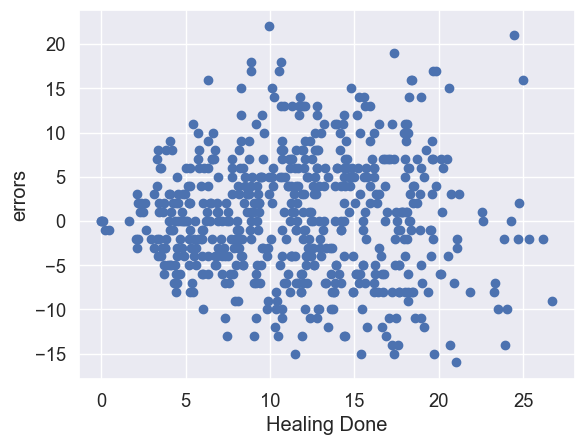

In [20]:
# check constant variance
plt.scatter(x = x, y = errors)
plt.xlabel('Healing Done')
plt.ylabel('errors');

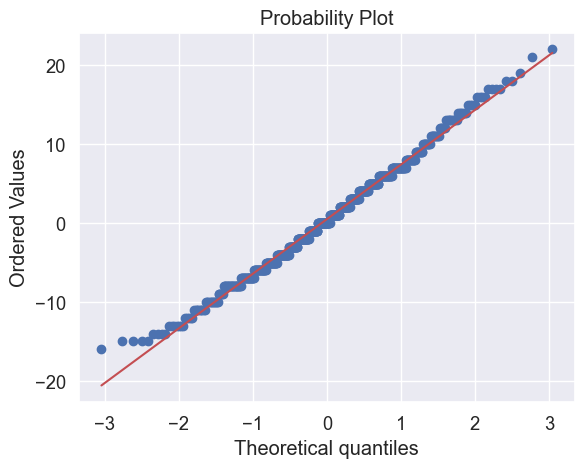

In [21]:
# check normality
stats.probplot(errors, dist="norm", plot=py)
py.show()

Independence seems to be met, as there are no patterns in the first plot. Linearity seems okay, but Constant variance may not be met; there seems to be less variability at the lower end of the Healing Done values than in the mid and higher end. Normality seems very well met. It may be difficult to trust the model completely because of the issues with Constant Variance. Perhaps a transformation of the y feature should be explored.